# 2do Parcial / Predicción del Precio del Diamante - ANN Regresión

# 1.Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importación fuente de datos

In [2]:
#Lectura datos históricos
df = pd.read_excel('./Diamond_Price_Prediction.xlsx',sheet_name='Diamond_Price_Prediction')

In [3]:
df.head(5)

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.columns


Index(['Carat(Weight of Daimond)', 'Cut(Quality)', 'Color', 'Clarity', 'Depth',
       'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')

# 3.Análisis y exploración de datos

## Limpieza inicial

In [5]:
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

In [6]:
#Eliminar variables que tienen un alto porcentaje de registros con el valor nulo
#Creamos una serie de pandas con el número de valores nulos de cada variable

df_var = df.isnull().sum() 
porcentaje_eliminacion = 0.1 

#Nos quedamos con las variables que tienen menos de un porcentaje de registros nulos
df_var = df_var[df_var<porcentaje_eliminacion*len(df)] 

 #Nos quedamos con el índice de la serie (los nombres de las variables de interés)
lista_variables_OK = df_var.index

#Filtramos el dataframe original y nos quedamos solo con las columnas de interés
df = df[lista_variables_OK] 
df.head(5)

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.columns

Index(['Carat(Weight of Daimond)', 'Cut(Quality)', 'Color', 'Clarity', 'Depth',
       'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')

In [8]:
df.rename({'Clarity':'Transparency'},axis=1,inplace=1)

In [33]:
#Eliminamos registros que tienen algún valor erróneo (se podría interpolar)

In [9]:
df.dropna(inplace=True)

In [10]:
df = pd.get_dummies(df, columns=['Cut(Quality)'])

In [11]:
df = pd.get_dummies(df, columns=['Transparency'])
df = pd.get_dummies(df, columns=['Color'])

In [12]:
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

Carat(Weight of Daimond)    0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
Cut(Quality)_Fair           0
Cut(Quality)_Good           0
Cut(Quality)_Ideal          0
Cut(Quality)_Premium        0
Cut(Quality)_Very Good      0
Transparency_I1             0
Transparency_IF             0
Transparency_SI1            0
Transparency_SI2            0
Transparency_VS1            0
Transparency_VS2            0
Transparency_VVS1           0
Transparency_VVS2           0
Color_D                     0
Color_E                     0
Color_F                     0
Color_G                     0
Color_H                     0
Color_I                     0
Color_J                     0
dtype: int64

In [13]:
df.describe().transpose() #Principales datos estadísticos del dataframe

,count,mean,std,min,25%,50%,75%,max
Carat(Weight of Daimond),53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
Depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
Table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
Price(in US dollars),53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
X(length),53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
Y(width),53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
Z(Depth),53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


## Visualización

### Plots básicos

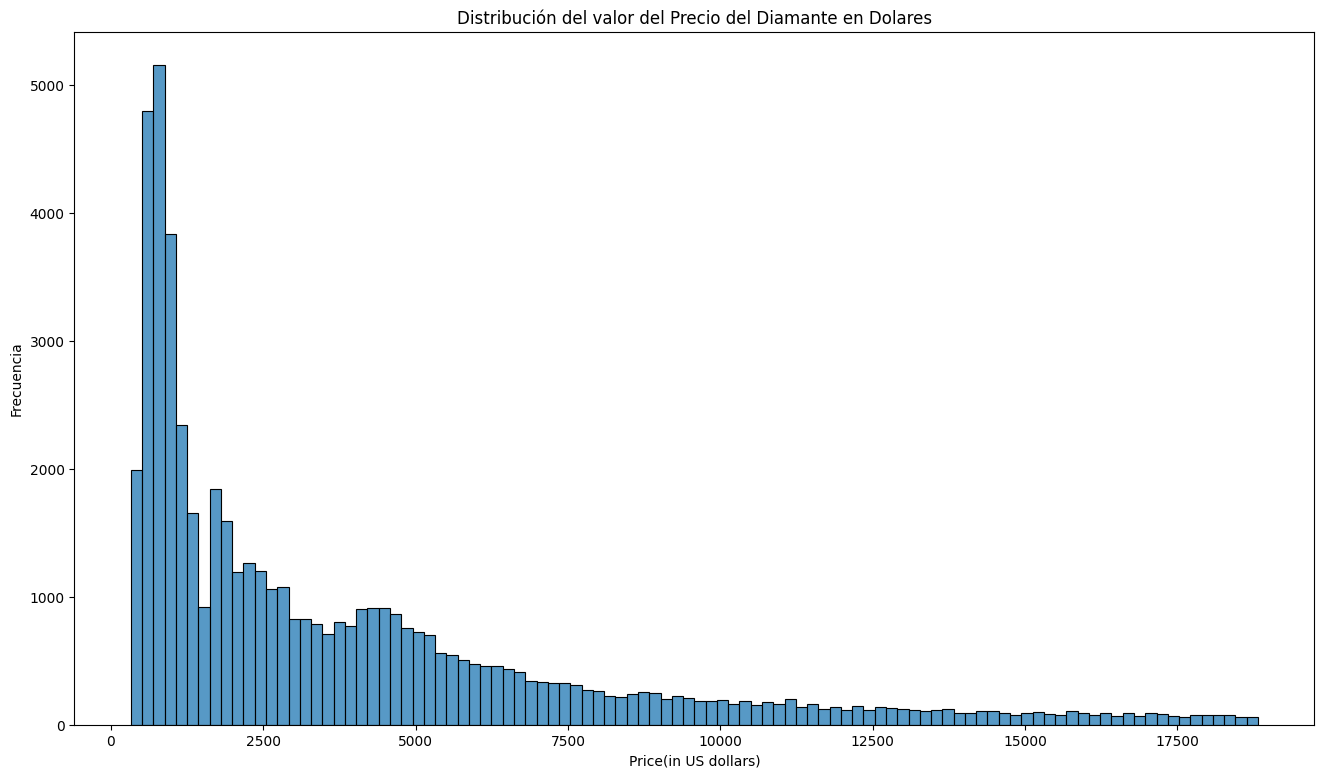

In [14]:
import seaborn as sns
plt.figure(figsize=(16,9))
# Crear el histograma con los datos 
sns.histplot(data=df, x='Price(in US dollars)', bins=100)
plt.title('Distribución del valor del Precio del Diamante en Dolares')
plt.xlabel('Price(in US dollars)')
plt.ylabel('Frecuencia')
plt.show()

In [15]:
#Verificar qué variables tienen mayor correlación con la salida
df.corr(numeric_only=True)['Price(in US dollars)'].sort_values()  

Color_E                    -0.101089
Cut(Quality)_Ideal         -0.097175
Transparency_VVS1          -0.095266
Color_D                    -0.072473
Transparency_VVS2          -0.052381
Transparency_IF            -0.049596
Color_F                    -0.024161
Depth                      -0.010647
Transparency_VS1           -0.009886
Transparency_VS2           -0.001062
Cut(Quality)_Good          -0.000312
Transparency_I1            -0.000255
Cut(Quality)_Very Good      0.006593
Color_G                     0.008556
Transparency_SI1            0.008957
Cut(Quality)_Fair           0.018728
Color_H                     0.059223
Color_J                     0.081710
Cut(Quality)_Premium        0.095706
Color_I                     0.097125
Table                       0.127134
Transparency_SI2            0.128420
Z(Depth)                    0.861249
Y(width)                    0.865421
X(length)                   0.884435
Carat(Weight of Daimond)    0.921591
Price(in US dollars)        1.000000
N

In [39]:
#Visualizar variables altamente correladas con la salida

<Axes: xlabel='Price(in US dollars)', ylabel='Carat(Weight of Daimond)'>

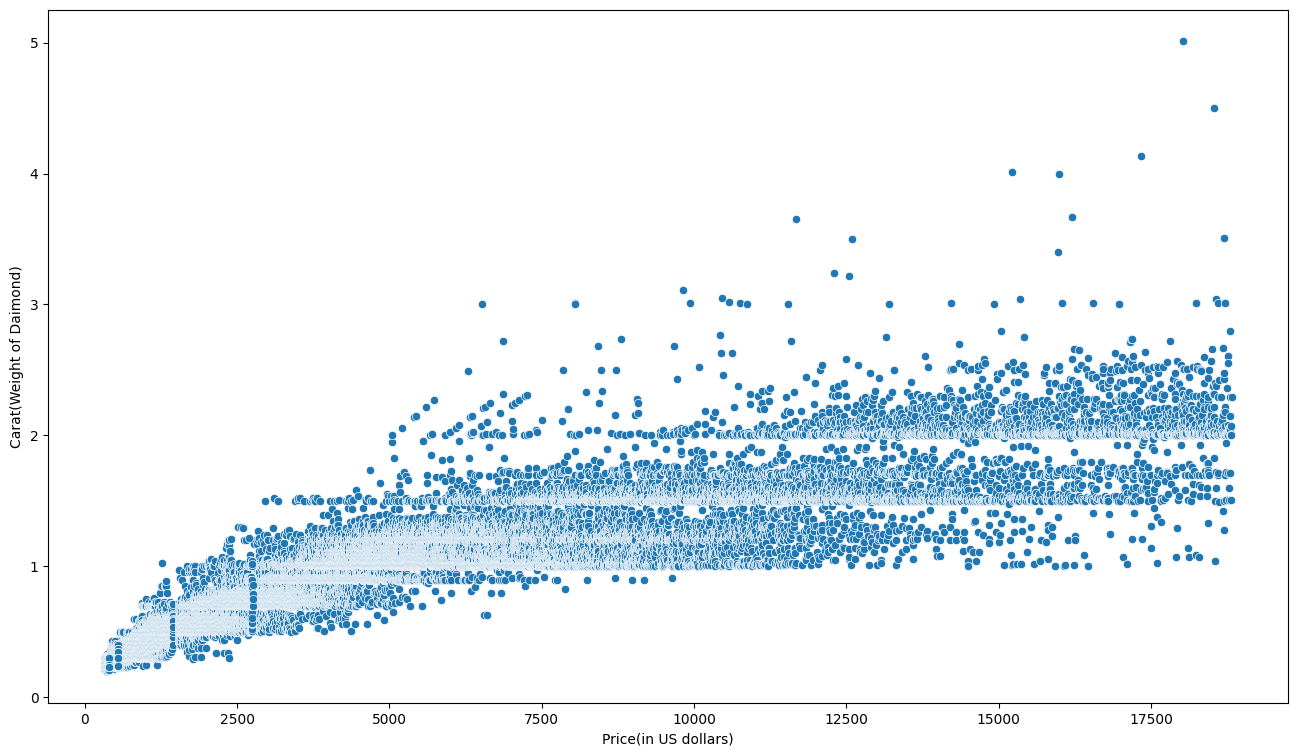

In [16]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='Price(in US dollars)',y='Carat(Weight of Daimond)',data=df)

<Axes: xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

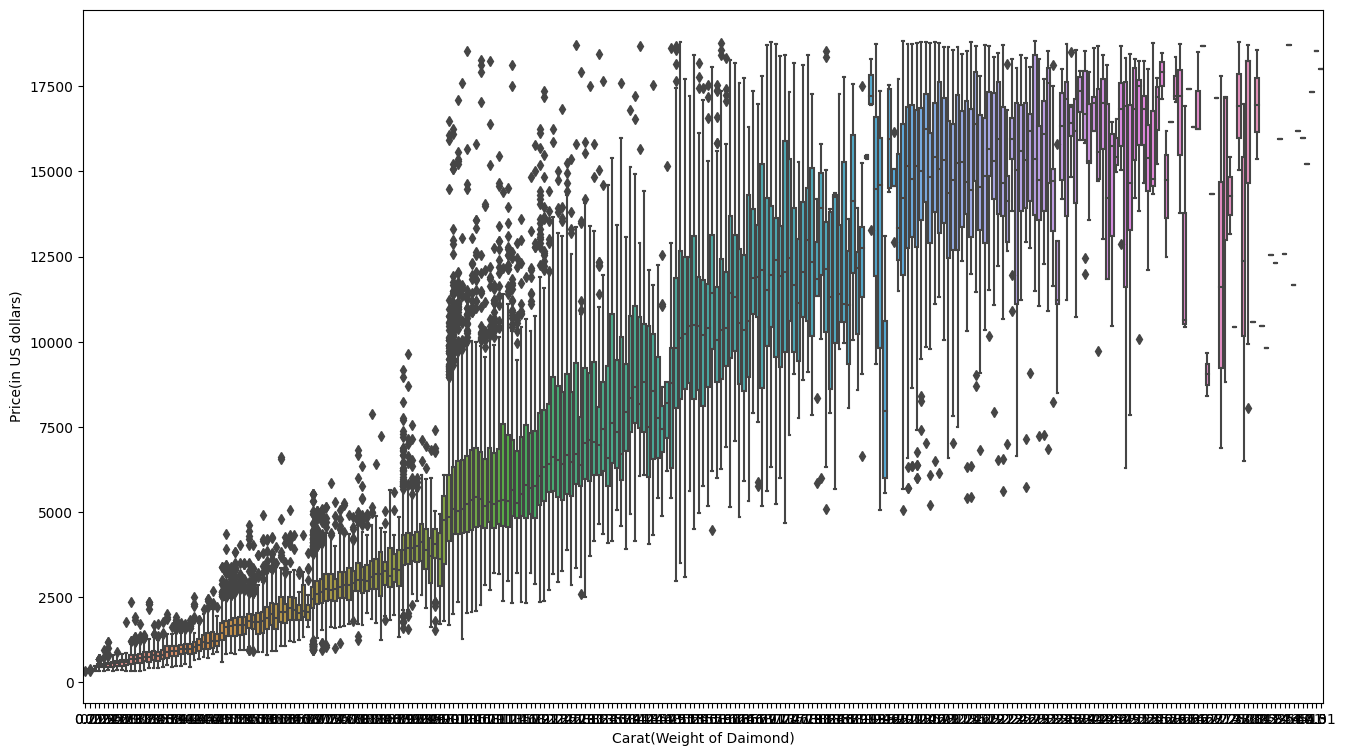

In [17]:
plt.figure(figsize=(16,9))
sns.boxplot(x='Carat(Weight of Daimond)',y='Price(in US dollars)',data=df)


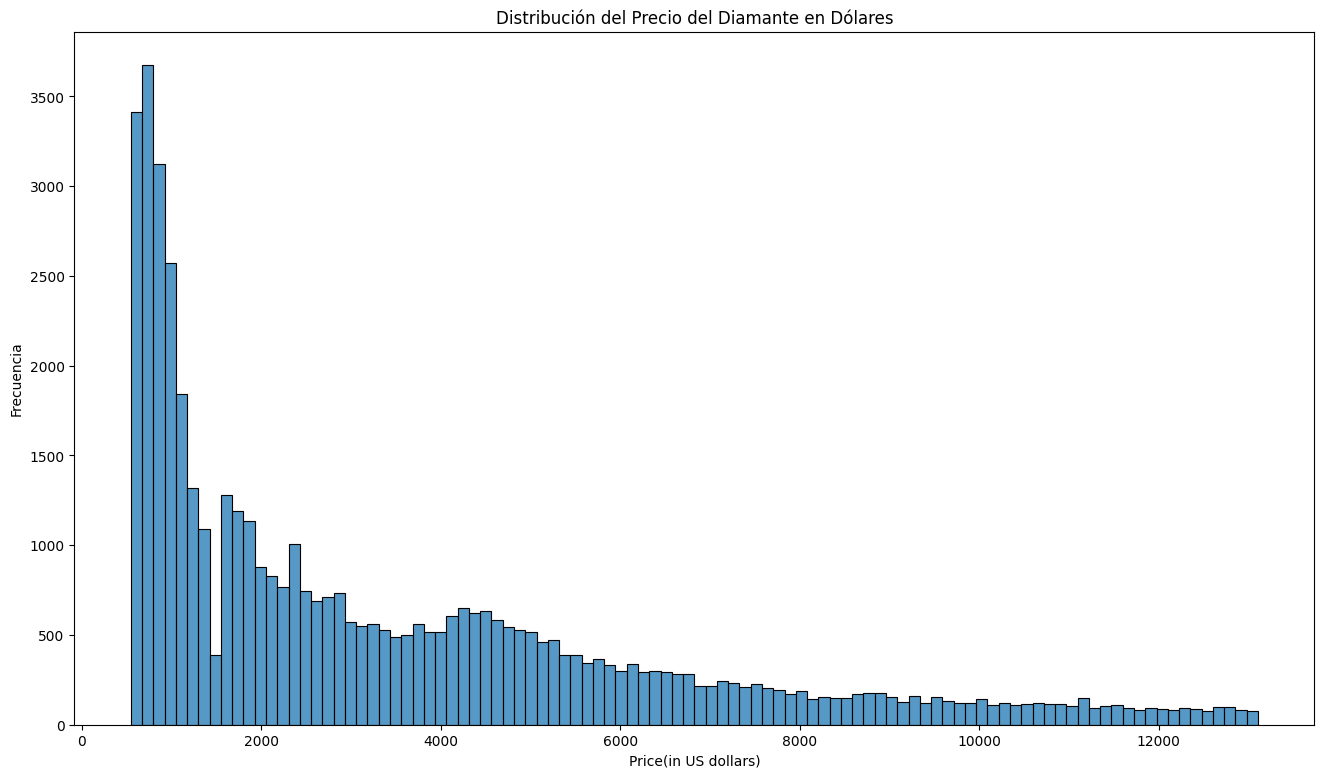

In [18]:
import seaborn as sns
plt.figure(figsize=(16,9))
# Calcular los percentiles 5 y 95 de la columna 
q5 = df['Price(in US dollars)'].quantile(0.05)
q95 = df['Price(in US dollars)'].quantile(0.95)

# Filtrar los valores que están dentro del rango intercuartílico
df= df[(df['Price(in US dollars)'] >= q5) & (df['Price(in US dollars)'] <= q95)]


# Crear el histograma con los datos filtrados
sns.histplot(data=df, x='Price(in US dollars)', bins=100)
#plt.hist(df_filtered['salary_monthly_NETO'])
plt.title('Distribución del Precio del Diamante en Dólares')
plt.xlabel('Price(in US dollars)')
plt.ylabel('Frecuencia')
plt.show()


## Limpieza final

### Eliminar columnas no correlacionadas

In [ ]:
# Objetivo: Eliminar variables que no tienen ninguna relación con la variable objetivo (precio) 
# o bien su información ya está incluida en otras variables - Aprovechar conocimiento del campo que estamos tratando

In [19]:
df.head()

,Carat(Weight of Daimond),Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth),Cut(Quality)_Fair,Cut(Quality)_Good,Cut(Quality)_Ideal,...,Transparency_VS2,Transparency_VVS1,Transparency_VVS2,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
60,0.35,60.9,57.0,552,4.54,4.59,2.78,False,False,True,...,False,False,False,False,False,False,False,False,True,False
61,0.30,62.6,59.0,552,4.23,4.27,2.66,False,False,False,...,False,False,False,True,False,False,False,False,False,False
62,0.30,62.5,57.0,552,4.29,4.32,2.69,False,False,True,...,False,False,False,True,False,False,False,False,False,False
63,0.30,62.1,56.0,552,4.30,4.33,2.68,False,False,True,...,False,False,False,True,False,False,False,False,False,False
64,0.42,61.5,59.0,552,4.78,4.84,2.96,False,False,False,...,False,False,False,False,False,False,False,False,True,False


<Axes: >

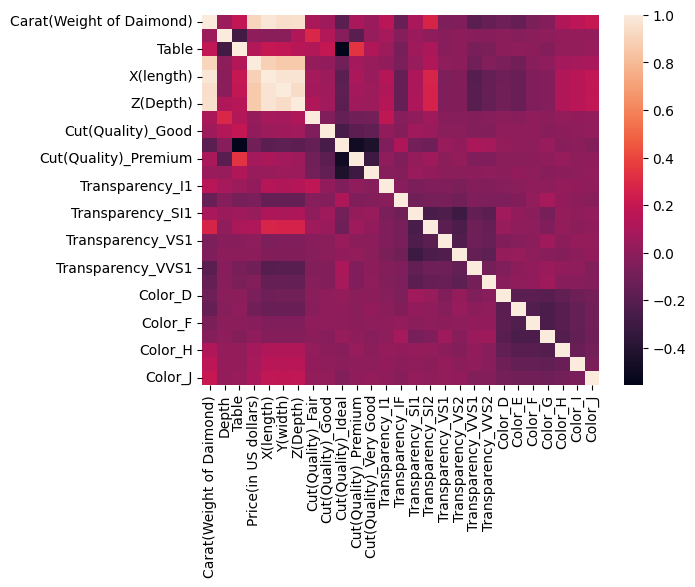

In [20]:
sns.heatmap(df.corr(numeric_only=True))

In [21]:
df = df.drop(['Depth'],axis=1)

In [22]:
df.head()

,Carat(Weight of Daimond),Table,Price(in US dollars),X(length),Y(width),Z(Depth),Cut(Quality)_Fair,Cut(Quality)_Good,Cut(Quality)_Ideal,Cut(Quality)_Premium,...,Transparency_VS2,Transparency_VVS1,Transparency_VVS2,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
60,0.35,57.0,552,4.54,4.59,2.78,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
61,0.30,59.0,552,4.23,4.27,2.66,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
62,0.30,57.0,552,4.29,4.32,2.69,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
63,0.30,56.0,552,4.30,4.33,2.68,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
64,0.42,59.0,552,4.78,4.84,2.96,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


# 4.Train Test Split

In [23]:
X = df.drop('Price(in US dollars)',axis=1)
y = df['Price(in US dollars)']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [26]:
X_train.shape

(38893, 25)

In [27]:
X_test.shape

(9724, 25)

In [28]:
y_train.shape

(38893,)

In [29]:
y_test.shape

(9724,)

# 5.Escalado

In [30]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [31]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [32]:
X_train

,Carat(Weight of Daimond),Table,X(length),Y(width),Z(Depth),Cut(Quality)_Fair,Cut(Quality)_Good,Cut(Quality)_Ideal,Cut(Quality)_Premium,Cut(Quality)_Very Good,...,Transparency_VS2,Transparency_VVS1,Transparency_VVS2,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
38226,0.40,57.0,4.74,4.81,2.93,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
34186,0.33,58.0,4.41,4.38,2.76,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
21445,1.50,59.0,7.26,7.33,4.53,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
32754,0.34,57.0,4.46,4.44,2.81,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
52834,0.84,58.0,5.99,5.97,3.74,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785,0.72,58.0,5.75,5.79,3.53,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
8126,1.10,58.0,6.61,6.59,4.10,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
17955,1.02,59.0,6.38,6.44,3.97,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
18141,1.21,59.0,6.80,6.85,4.18,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [33]:
X_train= scaler_x.fit_transform(X_train)

In [34]:
X_train

array([[-0.91208394, -0.20199771, -0.9530489 , ...,  2.40058823,
        -0.31800887, -0.22524695],
       [-1.08737032,  0.24754492, -1.28381052, ..., -0.41656457,
        -0.31800887, -0.22524695],
       [ 1.84241627,  0.69708755,  1.57276709, ..., -0.41656457,
        -0.31800887, -0.22524695],
       ...,
       [ 0.64045254,  0.69708755,  0.69073611, ..., -0.41656457,
        -0.31800887, -0.22524695],
       [ 1.11622985,  0.69708755,  1.11170544, ..., -0.41656457,
        -0.31800887, -0.22524695],
       [-0.16085661, -0.20199771,  0.04925903, ..., -0.41656457,
        -0.31800887, -0.22524695]])

In [35]:
X_test = scaler_x.transform(X_test)

In [36]:
X_test

array([[-0.1358157 , -0.20199771,  0.06930519, ..., -0.41656457,
        -0.31800887, -0.22524695],
       [ 0.61541163,  0.69708755,  0.550413  , ..., -0.41656457,
         3.1445664 , -0.22524695],
       [-1.13745214, -1.55062559, -1.32390284, ..., -0.41656457,
        -0.31800887, -0.22524695],
       ...,
       [ 0.41508434,  0.24754492,  0.550413  , ...,  2.40058823,
        -0.31800887, -0.22524695],
       [-1.08737032, -0.20199771, -1.31387976, ..., -0.41656457,
        -0.31800887, -0.22524695],
       [-0.08573388,  1.5961728 ,  0.12944366, ..., -0.41656457,
        -0.31800887, -0.22524695]])

In [37]:
y_train= scaler_y.fit_transform(y_train.values.reshape(-1, 1))

In [38]:
y_train

array([[-0.81893503],
       [-0.87334056],
       [ 2.02851029],
       ...,
       [ 1.26382886],
       [ 1.29453628],
       [-0.37267616]])

In [39]:
y_test = scaler_y.fit_transform(y_test.values.reshape(-1, 1))


In [40]:
y_test

array([[-0.44172457],
       [-0.01735035],
       [-0.80796995],
       ...,
       [ 0.06564287],
       [-0.93565182],
       [-0.37788364]])

# 6.Creación del modelo

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam



In [42]:
model = Sequential()
#Implementamos una red neuronal de 3 capas ocultas, utilizando optimizador Adam

num_neuronas = X_train.shape[1]
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# 7. Entrenamiento del modelo

In [43]:
#si indicamos validation_data en cada epoch calcula sobre el conjunto de test el resultado de pérdidas
#batch_size es el tamaño de datos que toma en cada cálculo (indicar potencia de 2) / epochs es el número de iteraciones sobre la red neuronal para ajustar los pesos (w) y bias (b)  
history=model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test), batch_size=10,epochs=1000) 

Epoch 1/1000
3890/3890 [==============================] - 16s 4ms/step - loss: 0.0521 - val_loss: 0.0936
Epoch 2/1000
3890/3890 [==============================] - 13s 3ms/step - loss: 0.0294 - val_loss: 0.0978
Epoch 3/1000
3890/3890 [==============================] - 13s 3ms/step - loss: 0.0249 - val_loss: 0.0923
Epoch 4/1000
3890/3890 [==============================] - 14s 4ms/step - loss: 0.0239 - val_loss: 0.1047
Epoch 5/1000
3890/3890 [==============================] - 13s 3ms/step - loss: 0.0233 - val_loss: 0.0951
Epoch 6/1000
3890/3890 [==============================] - 15s 4ms/step - loss: 0.0229 - val_loss: 0.0924
Epoch 7/1000
3890/3890 [==============================] - 18s 5ms/step - loss: 0.0224 - val_loss: 0.1049
Epoch 8/1000
3890/3890 [==============================] - 19s 5ms/step - loss: 0.0220 - val_loss: 0.0987
Epoch 9/1000
3890/3890 [==============================] - 18s 5ms/step - loss: 0.0217 - val_loss: 0.0940
Epoch 10/1000
3890/3890 [==============================

In [44]:
losses = pd.DataFrame(model.history.history)

<Axes: >

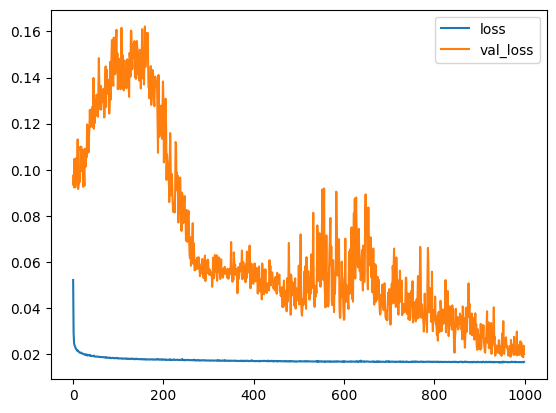

In [45]:
losses.plot()

# 8. Evaluación del modelo


In [46]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score


## Predicción sobre el conjunto de Test

In [47]:
X_test

array([[-0.1358157 , -0.20199771,  0.06930519, ..., -0.41656457,
        -0.31800887, -0.22524695],
       [ 0.61541163,  0.69708755,  0.550413  , ..., -0.41656457,
         3.1445664 , -0.22524695],
       [-1.13745214, -1.55062559, -1.32390284, ..., -0.41656457,
        -0.31800887, -0.22524695],
       ...,
       [ 0.41508434,  0.24754492,  0.550413  , ...,  2.40058823,
        -0.31800887, -0.22524695],
       [-1.08737032, -0.20199771, -1.31387976, ..., -0.41656457,
        -0.31800887, -0.22524695],
       [-0.08573388,  1.5961728 ,  0.12944366, ..., -0.41656457,
        -0.31800887, -0.22524695]])

In [48]:
predictions = model.predict(X_test)

304/304 [==============================] - 2s 3ms/step


In [49]:
mean_absolute_error(y_test,predictions)

0.080600701666634

In [50]:
np.sqrt(mean_squared_error(y_test,predictions))

0.14137214083447955

In [51]:
#¿En qué porcentaje nos estamos equivocando respecto al valor medio?
mean_absolute_error(y_test,predictions)/df['Price(in US dollars)'].mean() 

2.3250897332408105e-05

In [52]:
#¿En qué porcentaje nos estamos equivocando respecto al valor mediana?
    
mean_absolute_error(y_test,predictions)/df['Price(in US dollars)'].median()

3.361163539058966e-05

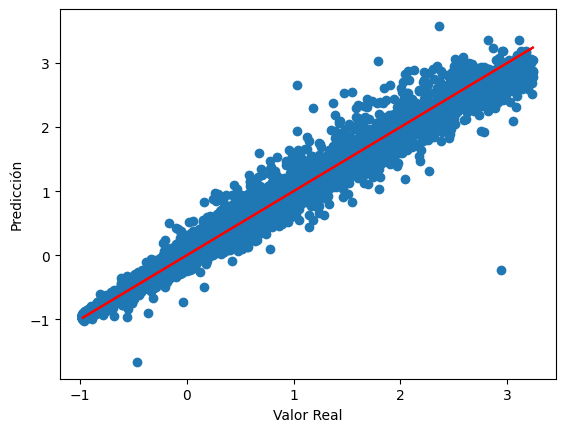

In [53]:
# Visualizar nuestra predicción
plt.scatter(y_test,predictions)
plt.xlabel("Valor Real")
plt.ylabel("Predicción")

# Predicción ideal
plt.plot(y_test,y_test,'r')

In [54]:
#rotar y_test para poder comparar con predictions
errors = y_test.reshape(y_test.shape[0], 1) - predictions  

Text(0, 0.5, 'Frecuencia')

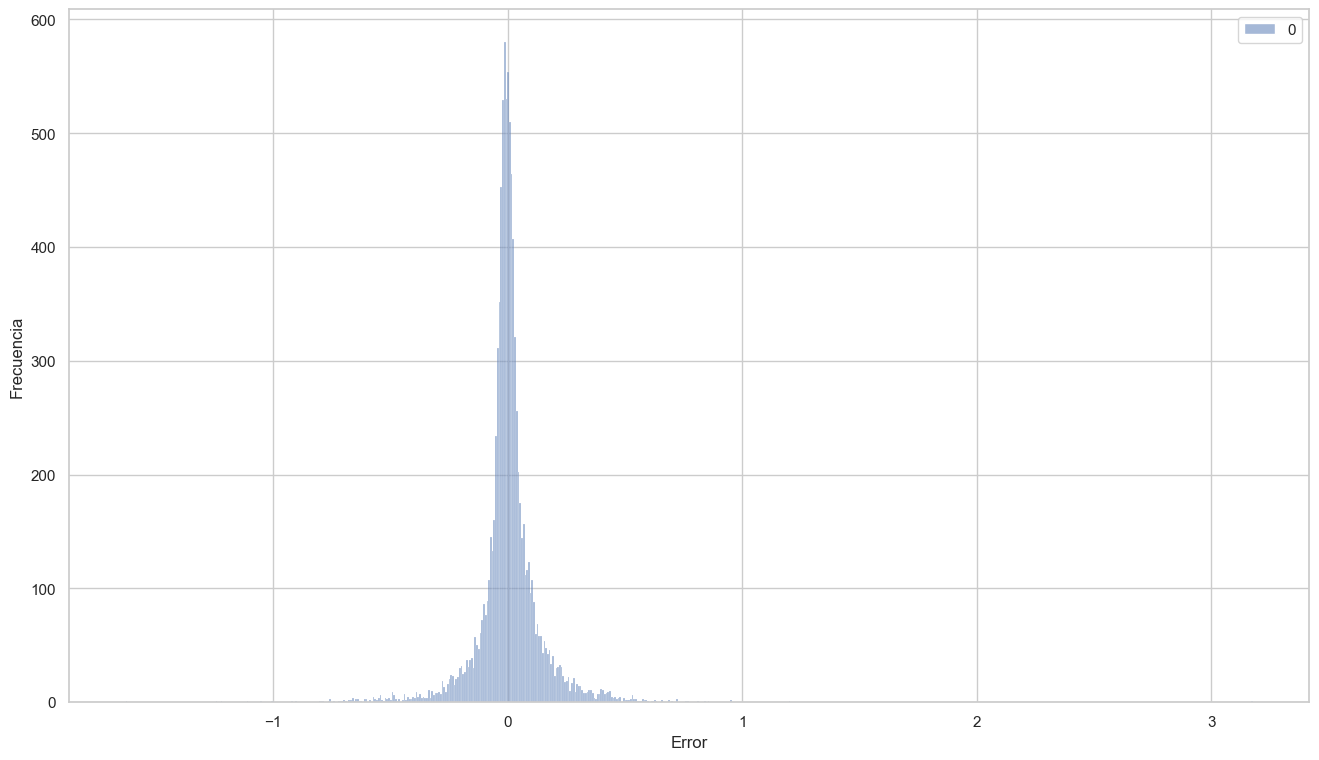

In [55]:
sns.set(style='whitegrid')
plt.figure(figsize=(16, 9))
sns.histplot(errors) #Idealmente debe estar concentrado el error en 0
plt.xlabel("Error")
plt.ylabel("Frecuencia")

